In [8]:
import csv

import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split

RANDOM_SEED = 42

# Specify each path

In [9]:
dataset = 'model/keypoint_classifier/keypoint.csv'
model_save_path = 'model/keypoint_classifier/keypoint_classifier.keras'
tflite_save_path = 'model/keypoint_classifier/keypoint_classifier.tflite'

# Set number of classes

In [10]:
NUM_CLASSES = 37

# Dataset reading

In [11]:
X_dataset = np.loadtxt(dataset, delimiter=',', dtype='float32', usecols=list(range(1, (21 * 2) + 1)))

In [12]:
y_dataset = np.loadtxt(dataset, delimiter=',', dtype='int32', usecols=(0))

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X_dataset, y_dataset, train_size=0.75, random_state=RANDOM_SEED)

# Model building

In [14]:
# model = tf.keras.models.Sequential([
#     tf.keras.layers.Input((21 * 2, )),
#     tf.keras.layers.Dropout(0.2),
#     tf.keras.layers.Dense(20, activation='relu'),
#     tf.keras.layers.Dropout(0.4),
#     tf.keras.layers.Dense(10, activation='relu'),
#     tf.keras.layers.Dense(NUM_CLASSES, activation='softmax')
# ])

# Improved ASL Recognition Model Architecture

# Configuration
NUM_CLASSES = 37  # Adjust to your actual number of classes
INPUT_SHAPE = 42  # 21 landmarks * 2 coordinates

# Build Model
model = tf.keras.models.Sequential([
    # Input layer
    tf.keras.layers.Input(shape=(INPUT_SHAPE,)),
    
    # First block - Large capacity
    tf.keras.layers.Dense(128, kernel_initializer='he_normal'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Activation('relu'),
    tf.keras.layers.Dropout(0.3),
    
    # Second block - Medium capacity
    tf.keras.layers.Dense(64, kernel_initializer='he_normal'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Activation('relu'),
    tf.keras.layers.Dropout(0.3),
    
    # Third block - Smaller capacity
    tf.keras.layers.Dense(32, kernel_initializer='he_normal'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Activation('relu'),
    tf.keras.layers.Dropout(0.2),
    
    # Output layer
    tf.keras.layers.Dense(NUM_CLASSES, activation='softmax')
])

# Compile Model
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)
model.compile(
    optimizer=optimizer,
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# Callbacks
callbacks = [
    # Reduce learning rate when validation loss plateaus
    tf.keras.callbacks.ReduceLROnPlateau(
        monitor='val_loss',
        factor=0.5,
        patience=5,
        min_lr=1e-6,
        verbose=1
    ),
    
    # Early stopping to prevent overfitting
    tf.keras.callbacks.EarlyStopping(
        monitor='val_loss',
        patience=15,
        restore_best_weights=True,
        verbose=1
    ),
    
    # Save best model
    tf.keras.callbacks.ModelCheckpoint(
        'best_asl_model.h5',
        monitor='val_accuracy',
        save_best_only=True,
        verbose=1
    )
]

# Train Model
history = model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs=100,
    batch_size=32,
    callbacks=callbacks,
    verbose=1
)

# Model Summary
model.summary()

Epoch 1/100
106/108 ━━━━━━━━━━━━━━━━━━━━ 0s 965us/step - accuracy: 0.0582 - loss: 3.6726    
Epoch 1: val_accuracy improved from None to 0.17524, saving model to best_asl_model.h5



Epoch 1: finished saving model to best_asl_model.h5
108/108 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.0995 - loss: 3.4641 - val_accuracy: 0.1752 - val_loss: 3.2365 - learning_rate: 0.0010
Epoch 2/100
 81/108 ━━━━━━━━━━━━━━━━━━━━ 0s 630us/step - accuracy: 0.2038 - loss: 2.9782
Epoch 2: val_accuracy improved from 0.17524 to 0.41500, saving model to best_asl_model.h5



Epoch 2: finished saving model to best_asl_model.h5
108/108 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2435 - loss: 2.8216 - val_accuracy: 0.4150 - val_loss: 2.5974 - learning_rate: 0.0010
Epoch 3/100
 56/108 ━━━━━━━━━━━━━━━━━━━━ 0s 914us/step - accuracy: 0.3116 - loss: 2.5015
Epoch 3: val_accuracy improved from 0.41500 to 0.53182, saving model to best_asl_model.h5



Epoch 3: finished saving model to best_asl_model.h5
108/108 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3447 - loss: 2.3741 - val_accuracy: 0.5318 - val_loss: 1.9784 - learning_rate: 0.0010
Epoch 4/100
 75/108 ━━━━━━━━━━━━━━━━━━━━ 0s 678us/step - accuracy: 0.4106 - loss: 2.1123
Epoch 4: val_accuracy improved from 0.53182 to 0.61988, saving model to best_asl_model.h5



Epoch 4: finished saving model to best_asl_model.h5
108/108 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4203 - loss: 2.0334 - val_accuracy: 0.6199 - val_loss: 1.5371 - learning_rate: 0.0010
Epoch 5/100
 81/108 ━━━━━━━━━━━━━━━━━━━━ 0s 629us/step - accuracy: 0.4199 - loss: 1.9131
Epoch 5: val_accuracy improved from 0.61988 to 0.68963, saving model to best_asl_model.h5



Epoch 5: finished saving model to best_asl_model.h5
108/108 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4543 - loss: 1.8283 - val_accuracy: 0.6896 - val_loss: 1.3020 - learning_rate: 0.0010
Epoch 6/100
 77/108 ━━━━━━━━━━━━━━━━━━━━ 0s 665us/step - accuracy: 0.5122 - loss: 1.6402
Epoch 6: val_accuracy improved from 0.68963 to 0.74542, saving model to best_asl_model.h5



Epoch 6: finished saving model to best_asl_model.h5
108/108 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5218 - loss: 1.5977 - val_accuracy: 0.7454 - val_loss: 1.1073 - learning_rate: 0.0010
Epoch 7/100
 79/108 ━━━━━━━━━━━━━━━━━━━━ 0s 642us/step - accuracy: 0.5415 - loss: 1.4871
Epoch 7: val_accuracy improved from 0.74542 to 0.75153, saving model to best_asl_model.h5



Epoch 7: finished saving model to best_asl_model.h5
108/108 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5486 - loss: 1.4590 - val_accuracy: 0.7515 - val_loss: 0.9643 - learning_rate: 0.0010
Epoch 8/100
 80/108 ━━━━━━━━━━━━━━━━━━━━ 0s 635us/step - accuracy: 0.5612 - loss: 1.3705
Epoch 8: val_accuracy improved from 0.75153 to 0.78901, saving model to best_asl_model.h5



Epoch 8: finished saving model to best_asl_model.h5
108/108 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5721 - loss: 1.3330 - val_accuracy: 0.7890 - val_loss: 0.8300 - learning_rate: 0.0010
Epoch 9/100
 64/108 ━━━━━━━━━━━━━━━━━━━━ 0s 802us/step - accuracy: 0.6034 - loss: 1.2209
Epoch 9: val_accuracy improved from 0.78901 to 0.82302, saving model to best_asl_model.h5



Epoch 9: finished saving model to best_asl_model.h5
108/108 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5948 - loss: 1.2473 - val_accuracy: 0.8230 - val_loss: 0.7399 - learning_rate: 0.0010
Epoch 10/100
 73/108 ━━━━━━━━━━━━━━━━━━━━ 0s 705us/step - accuracy: 0.5935 - loss: 1.2331
Epoch 10: val_accuracy did not improve from 0.82302
108/108 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6219 - loss: 1.1649 - val_accuracy: 0.7812 - val_loss: 0.7001 - learning_rate: 0.0010
Epoch 11/100
 70/108 ━━━━━━━━━━━━━━━━━━━━ 0s 728us/step - accuracy: 0.6315 - loss: 1.1085
Epoch 11: val_accuracy did not improve from 0.82302
108/108 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6257 - loss: 1.1344 - val_accuracy: 0.8126 - val_loss: 0.6332 - learning_rate: 0.0010
Epoch 12/100
 72/108 ━━━━━━━━━━━━━━━━━━━━ 0s 708us/step - accuracy: 0.6450 - loss: 1.0939
Epoch 12: val_accuracy did not improve from 0.82302
108/108 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6486 - loss: 1.0791 - val_accuracy: 0.7960 


Epoch 13: finished saving model to best_asl_model.h5
108/108 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6608 - loss: 1.0138 - val_accuracy: 0.8256 - val_loss: 0.5499 - learning_rate: 0.0010
Epoch 14/100
 64/108 ━━━━━━━━━━━━━━━━━━━━ 0s 798us/step - accuracy: 0.6885 - loss: 0.9528
Epoch 14: val_accuracy improved from 0.82563 to 0.85789, saving model to best_asl_model.h5



Epoch 14: finished saving model to best_asl_model.h5
108/108 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6806 - loss: 0.9675 - val_accuracy: 0.8579 - val_loss: 0.5267 - learning_rate: 0.0010
Epoch 15/100
 65/108 ━━━━━━━━━━━━━━━━━━━━ 0s 787us/step - accuracy: 0.6798 - loss: 0.9605
Epoch 15: val_accuracy did not improve from 0.85789
108/108 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6940 - loss: 0.9491 - val_accuracy: 0.8378 - val_loss: 0.5128 - learning_rate: 0.0010
Epoch 16/100
 76/108 ━━━━━━━━━━━━━━━━━━━━ 0s 667us/step - accuracy: 0.7037 - loss: 0.8568
Epoch 16: val_accuracy improved from 0.85789 to 0.85876, saving model to best_asl_model.h5



Epoch 16: finished saving model to best_asl_model.h5
108/108 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6911 - loss: 0.8992 - val_accuracy: 0.8588 - val_loss: 0.4758 - learning_rate: 0.0010
Epoch 17/100
 70/108 ━━━━━━━━━━━━━━━━━━━━ 0s 730us/step - accuracy: 0.6966 - loss: 0.9048
Epoch 17: val_accuracy did not improve from 0.85876
108/108 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7039 - loss: 0.8799 - val_accuracy: 0.8535 - val_loss: 0.4681 - learning_rate: 0.0010
Epoch 18/100
 70/108 ━━━━━━━━━━━━━━━━━━━━ 0s 731us/step - accuracy: 0.7190 - loss: 0.8099
Epoch 18: val_accuracy did not improve from 0.85876
108/108 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7132 - loss: 0.8491 - val_accuracy: 0.8588 - val_loss: 0.4526 - learning_rate: 0.0010
Epoch 19/100
 75/108 ━━━━━━━━━━━━━━━━━━━━ 0s 678us/step - accuracy: 0.7285 - loss: 0.8173
Epoch 19: val_accuracy improved from 0.85876 to 0.88579, saving model to best_asl_model.h5



Epoch 19: finished saving model to best_asl_model.h5
108/108 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7184 - loss: 0.8288 - val_accuracy: 0.8858 - val_loss: 0.4333 - learning_rate: 0.0010
Epoch 20/100
 73/108 ━━━━━━━━━━━━━━━━━━━━ 0s 700us/step - accuracy: 0.7300 - loss: 0.7786
Epoch 20: val_accuracy did not improve from 0.88579
108/108 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7341 - loss: 0.7835 - val_accuracy: 0.8745 - val_loss: 0.4186 - learning_rate: 0.0010
Epoch 21/100
 74/108 ━━━━━━━━━━━━━━━━━━━━ 0s 690us/step - accuracy: 0.7477 - loss: 0.7425
Epoch 21: val_accuracy improved from 0.88579 to 0.88666, saving model to best_asl_model.h5



Epoch 21: finished saving model to best_asl_model.h5
108/108 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7432 - loss: 0.7557 - val_accuracy: 0.8867 - val_loss: 0.4161 - learning_rate: 0.0010
Epoch 22/100
 73/108 ━━━━━━━━━━━━━━━━━━━━ 0s 703us/step - accuracy: 0.7337 - loss: 0.7609
Epoch 22: val_accuracy improved from 0.88666 to 0.89364, saving model to best_asl_model.h5



Epoch 22: finished saving model to best_asl_model.h5
108/108 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7371 - loss: 0.7552 - val_accuracy: 0.8936 - val_loss: 0.3922 - learning_rate: 0.0010
Epoch 23/100
 67/108 ━━━━━━━━━━━━━━━━━━━━ 0s 767us/step - accuracy: 0.7537 - loss: 0.7282
Epoch 23: val_accuracy did not improve from 0.89364
108/108 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7501 - loss: 0.7181 - val_accuracy: 0.8919 - val_loss: 0.3920 - learning_rate: 0.0010
Epoch 24/100
 71/108 ━━━━━━━━━━━━━━━━━━━━ 0s 717us/step - accuracy: 0.7670 - loss: 0.7061
Epoch 24: val_accuracy improved from 0.89364 to 0.90061, saving model to best_asl_model.h5



Epoch 24: finished saving model to best_asl_model.h5
108/108 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7635 - loss: 0.7117 - val_accuracy: 0.9006 - val_loss: 0.3731 - learning_rate: 0.0010
Epoch 25/100
 74/108 ━━━━━━━━━━━━━━━━━━━━ 0s 689us/step - accuracy: 0.7736 - loss: 0.6833
Epoch 25: val_accuracy did not improve from 0.90061
108/108 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7574 - loss: 0.7156 - val_accuracy: 0.8614 - val_loss: 0.4096 - learning_rate: 0.0010
Epoch 26/100
 74/108 ━━━━━━━━━━━━━━━━━━━━ 0s 690us/step - accuracy: 0.7688 - loss: 0.7104
Epoch 26: val_accuracy did not improve from 0.90061
108/108 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7679 - loss: 0.6898 - val_accuracy: 0.8867 - val_loss: 0.3862 - learning_rate: 0.0010
Epoch 27/100
 80/108 ━━━━━━━━━━━━━━━━━━━━ 0s 637us/step - accuracy: 0.7557 - loss: 0.7144
Epoch 27: val_accuracy improved from 0.90061 to 0.90497, saving model to best_asl_model.h5



Epoch 27: finished saving model to best_asl_model.h5
108/108 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7650 - loss: 0.7061 - val_accuracy: 0.9050 - val_loss: 0.3622 - learning_rate: 0.0010
Epoch 28/100
 69/108 ━━━━━━━━━━━━━━━━━━━━ 0s 745us/step - accuracy: 0.7811 - loss: 0.6518
Epoch 28: val_accuracy did not improve from 0.90497
108/108 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7682 - loss: 0.6719 - val_accuracy: 0.8928 - val_loss: 0.3707 - learning_rate: 0.0010
Epoch 29/100
 73/108 ━━━━━━━━━━━━━━━━━━━━ 0s 696us/step - accuracy: 0.7616 - loss: 0.6801
Epoch 29: val_accuracy did not improve from 0.90497
108/108 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7749 - loss: 0.6422 - val_accuracy: 0.8701 - val_loss: 0.3811 - learning_rate: 0.0010
Epoch 30/100
 77/108 ━━━━━━━━━━━━━━━━━━━━ 0s 660us/step - accuracy: 0.7650 - loss: 0.6678
Epoch 30: val_accuracy did not improve from 0.90497
108/108 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7824 - loss: 0.6143 - val_accuracy: 0.9041


Epoch 31: finished saving model to best_asl_model.h5
108/108 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7842 - loss: 0.6306 - val_accuracy: 0.9172 - val_loss: 0.3188 - learning_rate: 0.0010
Epoch 32/100
 75/108 ━━━━━━━━━━━━━━━━━━━━ 0s 677us/step - accuracy: 0.7770 - loss: 0.6458
Epoch 32: val_accuracy did not improve from 0.91718
108/108 ━━━━━━━━━━━━━━━━━━━━ 0s 994us/step - accuracy: 0.7801 - loss: 0.6371 - val_accuracy: 0.8910 - val_loss: 0.3373 - learning_rate: 0.0010
Epoch 33/100
 80/108 ━━━━━━━━━━━━━━━━━━━━ 0s 633us/step - accuracy: 0.7669 - loss: 0.6536
Epoch 33: val_accuracy did not improve from 0.91718
108/108 ━━━━━━━━━━━━━━━━━━━━ 0s 966us/step - accuracy: 0.7795 - loss: 0.6203 - val_accuracy: 0.9111 - val_loss: 0.3153 - learning_rate: 0.0010
Epoch 34/100
 81/108 ━━━━━━━━━━━━━━━━━━━━ 0s 626us/step - accuracy: 0.7924 - loss: 0.6025
Epoch 34: val_accuracy improved from 0.91718 to 0.92328, saving model to best_asl_model.h5



Epoch 34: finished saving model to best_asl_model.h5
108/108 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7882 - loss: 0.6162 - val_accuracy: 0.9233 - val_loss: 0.3091 - learning_rate: 0.0010
Epoch 35/100
 80/108 ━━━━━━━━━━━━━━━━━━━━ 0s 637us/step - accuracy: 0.7870 - loss: 0.5853
Epoch 35: val_accuracy did not improve from 0.92328
108/108 ━━━━━━━━━━━━━━━━━━━━ 0s 970us/step - accuracy: 0.7804 - loss: 0.6091 - val_accuracy: 0.9093 - val_loss: 0.3326 - learning_rate: 0.0010
Epoch 36/100
 85/108 ━━━━━━━━━━━━━━━━━━━━ 0s 596us/step - accuracy: 0.8144 - loss: 0.5633
Epoch 36: val_accuracy did not improve from 0.92328
108/108 ━━━━━━━━━━━━━━━━━━━━ 0s 929us/step - accuracy: 0.8074 - loss: 0.5736 - val_accuracy: 0.9050 - val_loss: 0.3143 - learning_rate: 0.0010
Epoch 37/100
 84/108 ━━━━━━━━━━━━━━━━━━━━ 0s 608us/step - accuracy: 0.7898 - loss: 0.5672
Epoch 37: val_accuracy did not improve from 0.92328
108/108 ━━━━━━━━━━━━━━━━━━━━ 0s 937us/step - accuracy: 0.7874 - loss: 0.5963 - val_accuracy: 


Epoch 42: finished saving model to best_asl_model.h5
108/108 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7917 - loss: 0.5681 - val_accuracy: 0.9259 - val_loss: 0.3019 - learning_rate: 0.0010
Epoch 43/100
 77/108 ━━━━━━━━━━━━━━━━━━━━ 0s 660us/step - accuracy: 0.8182 - loss: 0.5115
Epoch 43: val_accuracy improved from 0.92589 to 0.92764, saving model to best_asl_model.h5



Epoch 43: finished saving model to best_asl_model.h5
108/108 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8069 - loss: 0.5428 - val_accuracy: 0.9276 - val_loss: 0.2926 - learning_rate: 0.0010
Epoch 44/100
 80/108 ━━━━━━━━━━━━━━━━━━━━ 0s 633us/step - accuracy: 0.8190 - loss: 0.5237
Epoch 44: val_accuracy did not improve from 0.92764
108/108 ━━━━━━━━━━━━━━━━━━━━ 0s 953us/step - accuracy: 0.8136 - loss: 0.5424 - val_accuracy: 0.9224 - val_loss: 0.2921 - learning_rate: 0.0010
Epoch 45/100
 80/108 ━━━━━━━━━━━━━━━━━━━━ 0s 635us/step - accuracy: 0.7985 - loss: 0.5530
Epoch 45: val_accuracy did not improve from 0.92764
108/108 ━━━━━━━━━━━━━━━━━━━━ 0s 944us/step - accuracy: 0.8237 - loss: 0.5091 - val_accuracy: 0.8971 - val_loss: 0.3065 - learning_rate: 0.0010
Epoch 46/100
 83/108 ━━━━━━━━━━━━━━━━━━━━ 0s 616us/step - accuracy: 0.8184 - loss: 0.5208
Epoch 46: val_accuracy did not improve from 0.92764
108/108 ━━━━━━━━━━━━━━━━━━━━ 0s 958us/step - accuracy: 0.8133 - loss: 0.5387 - val_accuracy: 


Epoch 48: finished saving model to best_asl_model.h5
108/108 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8156 - loss: 0.5364 - val_accuracy: 0.9285 - val_loss: 0.2763 - learning_rate: 0.0010
Epoch 49/100
 82/108 ━━━━━━━━━━━━━━━━━━━━ 0s 618us/step - accuracy: 0.8120 - loss: 0.4894
Epoch 49: val_accuracy did not improve from 0.92851
108/108 ━━━━━━━━━━━━━━━━━━━━ 0s 936us/step - accuracy: 0.8165 - loss: 0.5129 - val_accuracy: 0.9189 - val_loss: 0.2777 - learning_rate: 0.0010
Epoch 50/100
 84/108 ━━━━━━━━━━━━━━━━━━━━ 0s 608us/step - accuracy: 0.8335 - loss: 0.4959
Epoch 50: val_accuracy did not improve from 0.92851
108/108 ━━━━━━━━━━━━━━━━━━━━ 0s 941us/step - accuracy: 0.8202 - loss: 0.5178 - val_accuracy: 0.9198 - val_loss: 0.2785 - learning_rate: 0.0010
Epoch 51/100
 79/108 ━━━━━━━━━━━━━━━━━━━━ 0s 651us/step - accuracy: 0.8176 - loss: 0.5259
Epoch 51: val_accuracy did not improve from 0.92851
108/108 ━━━━━━━━━━━━━━━━━━━━ 0s 990us/step - accuracy: 0.8173 - loss: 0.5281 - val_accuracy: 


Epoch 58: finished saving model to best_asl_model.h5
108/108 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8266 - loss: 0.4900 - val_accuracy: 0.9355 - val_loss: 0.2684 - learning_rate: 5.0000e-04
Epoch 59/100
 77/108 ━━━━━━━━━━━━━━━━━━━━ 0s 659us/step - accuracy: 0.8648 - loss: 0.3872
Epoch 59: val_accuracy did not improve from 0.93548
108/108 ━━━━━━━━━━━━━━━━━━━━ 0s 993us/step - accuracy: 0.8455 - loss: 0.4368 - val_accuracy: 0.9320 - val_loss: 0.2623 - learning_rate: 5.0000e-04
Epoch 60/100
 82/108 ━━━━━━━━━━━━━━━━━━━━ 0s 619us/step - accuracy: 0.8274 - loss: 0.4928
Epoch 60: val_accuracy did not improve from 0.93548
108/108 ━━━━━━━━━━━━━━━━━━━━ 0s 936us/step - accuracy: 0.8380 - loss: 0.4595 - val_accuracy: 0.9259 - val_loss: 0.2641 - learning_rate: 5.0000e-04
Epoch 61/100
 85/108 ━━━━━━━━━━━━━━━━━━━━ 0s 598us/step - accuracy: 0.8465 - loss: 0.4674
Epoch 61: val_accuracy did not improve from 0.93548
108/108 ━━━━━━━━━━━━━━━━━━━━ 0s 940us/step - accuracy: 0.8424 - loss: 0.4562 - va


Epoch 66: finished saving model to best_asl_model.h5
108/108 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8444 - loss: 0.4274 - val_accuracy: 0.9372 - val_loss: 0.2584 - learning_rate: 5.0000e-04
Epoch 67/100
 80/108 ━━━━━━━━━━━━━━━━━━━━ 0s 638us/step - accuracy: 0.8574 - loss: 0.4278
Epoch 67: val_accuracy did not improve from 0.93723
108/108 ━━━━━━━━━━━━━━━━━━━━ 0s 951us/step - accuracy: 0.8473 - loss: 0.4538 - val_accuracy: 0.9294 - val_loss: 0.2536 - learning_rate: 5.0000e-04
Epoch 68/100
 83/108 ━━━━━━━━━━━━━━━━━━━━ 0s 614us/step - accuracy: 0.8557 - loss: 0.4159
Epoch 68: val_accuracy did not improve from 0.93723
108/108 ━━━━━━━━━━━━━━━━━━━━ 0s 948us/step - accuracy: 0.8508 - loss: 0.4236 - val_accuracy: 0.9311 - val_loss: 0.2566 - learning_rate: 5.0000e-04
Epoch 69/100
 76/108 ━━━━━━━━━━━━━━━━━━━━ 0s 673us/step - accuracy: 0.8540 - loss: 0.3917
Epoch 69: val_accuracy did not improve from 0.93723
108/108 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8499 - loss: 0.4040 - val_


Epoch 80: finished saving model to best_asl_model.h5
108/108 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8540 - loss: 0.4105 - val_accuracy: 0.9381 - val_loss: 0.2422 - learning_rate: 5.0000e-04
Epoch 81/100
 80/108 ━━━━━━━━━━━━━━━━━━━━ 0s 637us/step - accuracy: 0.8593 - loss: 0.4210
Epoch 81: val_accuracy did not improve from 0.93810
108/108 ━━━━━━━━━━━━━━━━━━━━ 0s 985us/step - accuracy: 0.8517 - loss: 0.4251 - val_accuracy: 0.9303 - val_loss: 0.2455 - learning_rate: 5.0000e-04
Epoch 82/100
 83/108 ━━━━━━━━━━━━━━━━━━━━ 0s 612us/step - accuracy: 0.8723 - loss: 0.3851
Epoch 82: val_accuracy did not improve from 0.93810
108/108 ━━━━━━━━━━━━━━━━━━━━ 0s 943us/step - accuracy: 0.8543 - loss: 0.4085 - val_accuracy: 0.9320 - val_loss: 0.2533 - learning_rate: 5.0000e-04
Epoch 83/100
 80/108 ━━━━━━━━━━━━━━━━━━━━ 0s 633us/step - accuracy: 0.8568 - loss: 0.4072
Epoch 83: val_accuracy did not improve from 0.93810
108/108 ━━━━━━━━━━━━━━━━━━━━ 0s 949us/step - accuracy: 0.8621 - loss: 0.4020 - va


Epoch 95: finished saving model to best_asl_model.h5
108/108 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8578 - loss: 0.3920 - val_accuracy: 0.9390 - val_loss: 0.2376 - learning_rate: 2.5000e-04
Epoch 96/100
 69/108 ━━━━━━━━━━━━━━━━━━━━ 0s 742us/step - accuracy: 0.8659 - loss: 0.3818
Epoch 96: val_accuracy did not improve from 0.93897
108/108 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8604 - loss: 0.3775 - val_accuracy: 0.9390 - val_loss: 0.2407 - learning_rate: 2.5000e-04
Epoch 97/100
 81/108 ━━━━━━━━━━━━━━━━━━━━ 0s 629us/step - accuracy: 0.8564 - loss: 0.3878
Epoch 97: ReduceLROnPlateau reducing learning rate to 0.0001250000059371814.

Epoch 97: val_accuracy did not improve from 0.93897
108/108 ━━━━━━━━━━━━━━━━━━━━ 0s 981us/step - accuracy: 0.8525 - loss: 0.3937 - val_accuracy: 0.9390 - val_loss: 0.2400 - learning_rate: 2.5000e-04
Epoch 98/100
 78/108 ━━━━━━━━━━━━━━━━━━━━ 0s 653us/step - accuracy: 0.8637 - loss: 0.3669
Epoch 98: val_accuracy improved from 0.93897 to 0.93984, 


Epoch 98: finished saving model to best_asl_model.h5
108/108 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8662 - loss: 0.3801 - val_accuracy: 0.9398 - val_loss: 0.2389 - learning_rate: 1.2500e-04
Epoch 99/100
 76/108 ━━━━━━━━━━━━━━━━━━━━ 0s 672us/step - accuracy: 0.8768 - loss: 0.3850
Epoch 99: val_accuracy improved from 0.93984 to 0.94071, saving model to best_asl_model.h5



Epoch 99: finished saving model to best_asl_model.h5
108/108 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8735 - loss: 0.3729 - val_accuracy: 0.9407 - val_loss: 0.2378 - learning_rate: 1.2500e-04
Epoch 100/100
 69/108 ━━━━━━━━━━━━━━━━━━━━ 0s 740us/step - accuracy: 0.8752 - loss: 0.3562
Epoch 100: val_accuracy did not improve from 0.94071
108/108 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8633 - loss: 0.3876 - val_accuracy: 0.9390 - val_loss: 0.2380 - learning_rate: 1.2500e-04
Restoring model weights from the end of the best epoch: 92.


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_4 (Dense)                 │ (None, 128)            │         5,504 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_3 (Activation)       │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 64)             │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_4 (Activation)       │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 32)             │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_5 (Activation)       │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 37)             │         1,221 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 52,977 (206.95 KB)

 Trainable params: 17,509 (68.39 KB)

 Non-trainable params: 448 (1.75 KB)

 Optimizer params: 35,020 (136.80 KB)

In [15]:
# model.summary()  # tf.keras.utils.plot_model(model, show_shapes=True)

In [16]:
# # Model checkpoint callback
# cp_callback = tf.keras.callbacks.ModelCheckpoint(
#     model_save_path, verbose=1, save_weights_only=False)
# # # Callback for early stopping
# es_callback = tf.keras.callbacks.EarlyStopping(patience=20, verbose=1)

In [17]:
# # Model compilation
# model.compile(
#     optimizer='adam',
#     loss='sparse_categorical_crossentropy',
#     metrics=['accuracy']
# )

# Model training

In [18]:
# model.fit(
#     X_train,
#     y_train,
#     epochs=1000,
#     batch_size=128,
#     validation_data=(X_test, y_test),
#     callbacks=[cp_callback, es_callback]
# )

In [19]:
# Model evaluation
val_loss, val_acc = model.evaluate(X_test, y_test, batch_size=128)

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9372 - loss: 0.2362


In [20]:
# Loading the saved model
model = tf.keras.models.load_model(model_save_path)

ValueError: Expected a model.weights.h5 or model.weights.npz file.

In [ ]:
# Inference test
predict_result = model.predict(np.array([X_test[0]]))
print(np.squeeze(predict_result))
print(np.argmax(np.squeeze(predict_result)))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
[1.3415738e-04 1.4125967e-02 3.8397454e-02 2.1956382e-02 2.7239525e-03
 7.9916482e-04 8.9021819e-03 6.8589784e-03 7.4868457e-04 6.0290791e-04
 6.2650163e-04 9.3978671e-03 1.1947873e-04 8.8136336e-03 5.6262757e-04
 1.0645068e-03 4.4418438e-04 1.7171784e-03 2.7266823e-02 2.2474687e-05
 1.7141064e-01 2.8419314e-04 7.8294968e-04 3.1710644e-03 2.1273342e-04
 1.9279580e-03 6.3393949e-05 7.1604282e-02 3.4804150e-04 7.3896599e-04
 3.1538028e-01 2.6807955e-01 1.7938938e-02 1.7920734e-03 9.7986532e-04
 1.5083150e-09 8.9584856e-10]
30


# Confusion matrix

36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 426us/step


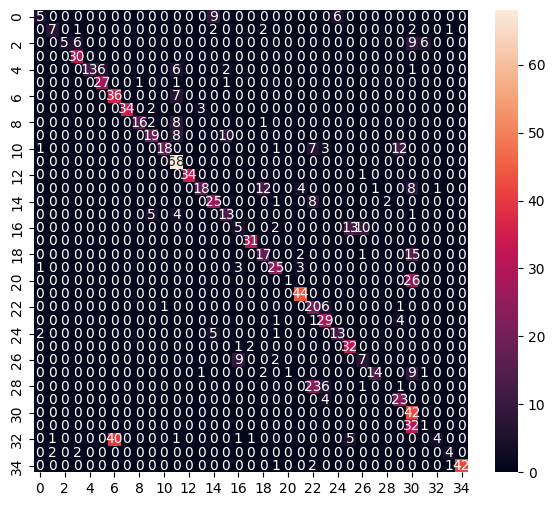

Classification Report
              precision    recall  f1-score   support

           0       0.56      0.25      0.34        20
           1       0.70      0.47      0.56        15
           2       1.00      0.19      0.32        26
           3       0.77      1.00      0.87        30
           4       1.00      0.46      0.63        28
           5       0.82      0.90      0.86        30
           6       0.47      0.84      0.61        43
           7       1.00      0.87      0.93        39
           8       0.94      0.59      0.73        27
           9       0.68      0.51      0.58        37
          10       0.95      0.43      0.59        42
          11       0.66      1.00      0.80        68
          12       1.00      0.97      0.99        35
          13       0.82      0.41      0.55        44
          14       0.61      0.69      0.65        36
          15       0.50      0.57      0.53        23
          16       0.26      0.17      0.20        30
     

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report

def print_confusion_matrix(y_true, y_pred, report=True):
    labels = sorted(list(set(y_true)))
    cmx_data = confusion_matrix(y_true, y_pred, labels=labels)
    
    df_cmx = pd.DataFrame(cmx_data, index=labels, columns=labels)
 
    fig, ax = plt.subplots(figsize=(7, 6))
    sns.heatmap(df_cmx, annot=True, fmt='g' ,square=False)
    ax.set_ylim(len(set(y_true)), 0)
    plt.show()
    
    if report:
        print('Classification Report')
        print(classification_report(y_test, y_pred))

Y_pred = model.predict(X_test)
y_pred = np.argmax(Y_pred, axis=1)

print_confusion_matrix(y_test, y_pred)

# Convert to model for Tensorflow-Lite

In [ ]:
# Save as a model dedicated to inference
model.save(model_save_path, include_optimizer=False)

In [ ]:
# Transform model (quantization)

converter = tf.lite.TFLiteConverter.from_keras_model(model)
converter.optimizations = [tf.lite.Optimize.DEFAULT]
tflite_quantized_model = converter.convert()

open(tflite_save_path, 'wb').write(tflite_quantized_model)

INFO:tensorflow:Assets written to: /var/folders/qw/y3ys43gs7cdblx18lvtrz8r40000gn/T/tmpcr27bb2c/assets


INFO:tensorflow:Assets written to: /var/folders/qw/y3ys43gs7cdblx18lvtrz8r40000gn/T/tmpcr27bb2c/assets


Saved artifact at '/var/folders/qw/y3ys43gs7cdblx18lvtrz8r40000gn/T/tmpcr27bb2c'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 42), dtype=tf.float32, name='input_layer_10')
Output Type:
  TensorSpec(shape=(None, 37), dtype=tf.float32, name=None)
Captures:
  13489251984: TensorSpec(shape=(), dtype=tf.resource, name=None)
  13489248528: TensorSpec(shape=(), dtype=tf.resource, name=None)
  13489252176: TensorSpec(shape=(), dtype=tf.resource, name=None)
  13489251216: TensorSpec(shape=(), dtype=tf.resource, name=None)
  13489252752: TensorSpec(shape=(), dtype=tf.resource, name=None)
  13489256976: TensorSpec(shape=(), dtype=tf.resource, name=None)


W0000 00:00:1768687009.723086  381474 tf_tfl_flatbuffer_helpers.cc:365] Ignored output_format.
W0000 00:00:1768687009.723094  381474 tf_tfl_flatbuffer_helpers.cc:368] Ignored drop_control_dependency.
2026-01-17 14:56:49.723183: I tensorflow/cc/saved_model/reader.cc:83] Reading SavedModel from: /var/folders/qw/y3ys43gs7cdblx18lvtrz8r40000gn/T/tmpcr27bb2c
2026-01-17 14:56:49.723440: I tensorflow/cc/saved_model/reader.cc:52] Reading meta graph with tags { serve }
2026-01-17 14:56:49.723445: I tensorflow/cc/saved_model/reader.cc:147] Reading SavedModel debug info (if present) from: /var/folders/qw/y3ys43gs7cdblx18lvtrz8r40000gn/T/tmpcr27bb2c
2026-01-17 14:56:49.725853: I tensorflow/cc/saved_model/loader.cc:236] Restoring SavedModel bundle.
2026-01-17 14:56:49.740136: I tensorflow/cc/saved_model/loader.cc:220] Running initialization op on SavedModel bundle at path: /var/folders/qw/y3ys43gs7cdblx18lvtrz8r40000gn/T/tmpcr27bb2c
2026-01-17 14:56:49.744643: I tensorflow/cc/saved_model/loader.cc:

8056

# Inference test

In [ ]:
interpreter = tf.lite.Interpreter(model_path=tflite_save_path)
interpreter.allocate_tensors()

/Users/syedessamuddinkhawaja/Desktop/Extra Projects/Unspoken/venv/lib/python3.12/site-packages/tensorflow/lite/python/interpreter.py:457: UserWarning:     Warning: tf.lite.Interpreter is deprecated and is scheduled for deletion in
    TF 2.20. Please use the LiteRT interpreter from the ai_edge_litert package.
    See the [migration guide](https://ai.google.dev/edge/litert/migration)
    for details.
    
  warnings.warn(_INTERPRETER_DELETION_WARNING)


In [ ]:
# Get I / O tensor
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

In [ ]:
interpreter.set_tensor(input_details[0]['index'], np.array([X_test[0]]))

In [ ]:
%%time
# Inference implementation
interpreter.invoke()
tflite_results = interpreter.get_tensor(output_details[0]['index'])

CPU times: user 29 μs, sys: 9 μs, total: 38 μs
Wall time: 33.1 μs


In [ ]:
print(np.squeeze(tflite_results))
print(np.argmax(np.squeeze(tflite_results)))

[1.3415740e-04 1.4125967e-02 3.8397454e-02 2.1956390e-02 2.7239525e-03
 7.9916482e-04 8.9021800e-03 6.8589784e-03 7.4868416e-04 6.0290768e-04
 6.2650134e-04 9.3978653e-03 1.1947880e-04 8.8136289e-03 5.6262757e-04
 1.0645069e-03 4.4418412e-04 1.7171777e-03 2.7266819e-02 2.2474689e-05
 1.7141056e-01 2.8419300e-04 7.8294968e-04 3.1710628e-03 2.1273343e-04
 1.9279580e-03 6.3393891e-05 7.1604311e-02 3.4804168e-04 7.3896634e-04
 3.1538028e-01 2.6807955e-01 1.7938936e-02 1.7920743e-03 9.7986532e-04
 1.5083123e-09 8.9584862e-10]
30
